In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import measure, data, io
from skimage.feature import match_template, peak_local_max
import cv2

In [102]:
image= io.imread('../../tiff_files/Tune22_light_on_viewer_D1542_001.tiff')
dot1= io.imread('../../tiff_files/dots/dot1.tiff')
dot2= io.imread('../../tiff_files/dots/dot2.tiff')

(6, 8)

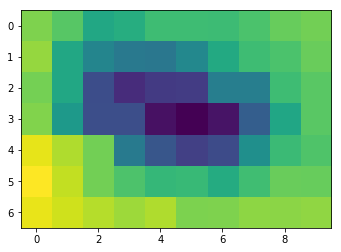

In [99]:
plt.imshow(dot2)
dot2.shape
dot1.shape

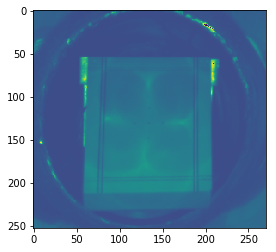

In [103]:
plt.imshow(image)

(7, 7)

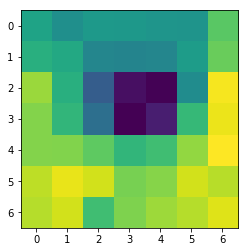

In [165]:
im=image[128:135, 147:154]
plt.imshow(im)

im.shape

(8, 8)

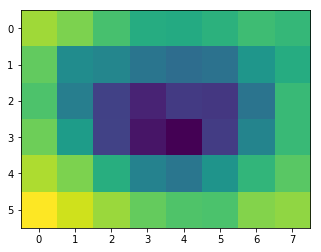

In [100]:
plt.imshow(image[159:165, 267:275])
im=image[158:166, 267:275]
im.shape

In [166]:
#im.save('../../tiff_files/dots/dot2.tiff')
cv2.imwrite('../../tiff_files/dots/dot6.tiff', im)


True

In [61]:
dot1= dot[163:172,216:227]
dot2=dot[164:170,219:224]
dot3=dot[161:175,215:229]
dot4=dot[132:138,220:228]

/home/sara/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
/home/sara/anaconda3/lib/python3.7/site-packages/skimage/feature/template.py:180: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return response[slices]


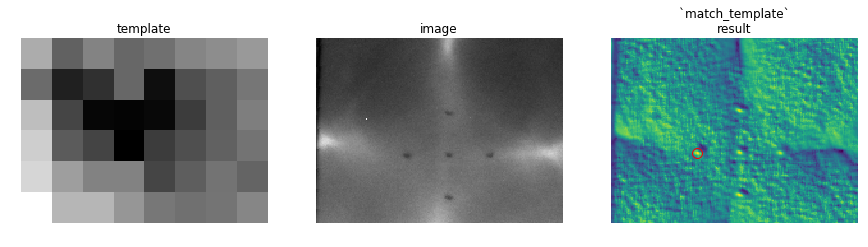

In [92]:
result = match_template(image, dot4)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(dot4, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
#hcoin, wcoin = coin.shape
#rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
#ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

In [115]:
result = match_template(image, dot4,pad_input=True) #added the pad_input bool


/home/sara/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
/home/sara/anaconda3/lib/python3.7/site-packages/skimage/feature/template.py:180: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return response[slices]


(686, 2)
(653, 2)
(615, 2)
(570, 2)
(512, 2)
(441, 2)
(363, 2)
(280, 2)
(198, 2)
(126, 2)
(78, 2)
(34, 2)
(8, 2)
(6, 2)
[[126 104]
 [ 93 136]
 [ 93  71]
 [ 92 104]
 [ 59 104]]


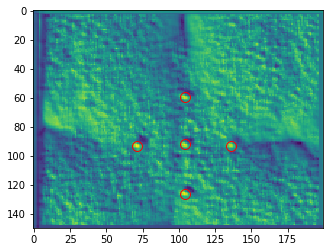

In [120]:

threshold_rel=0.1
flag = True
while (flag):
    peaks = peak_local_max(result,min_distance=2,threshold_rel=threshold_rel) # find our peaks
    if (peaks.shape[0]>5):
        threshold_rel+=0.05
        print(peaks.shape)
    elif (peaks.shape[0]<=5):
        print(peaks)
        flag= False
        continue
    else:
        print("Couldn't find threshold.")
        
# produce a plot equivalent to the one in the docs
plt.imshow(result)
# highlight matched regions (plural)
plt.plot(peaks[:,1], peaks[:,0], 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

In [207]:
def isSquare(peaks):
    #calculate center if it's square
    sum_y = 0
    sum_x = 0
    for i in range(5):
        sum_y += peaks[i][0]
        sum_x += peaks[i][1]
    center=[math.ceil(sum_y/5), math.ceil(sum_x/5)]
    #check that center coordinates are present in peaks. If not, then we did not detect the right ones
    for row in peaks:
        print(row, center)
        if (((center[0]-3)<row[0]<(center[0]+3)) & ((center[1]-3)<row[1]<(3+center[1]))):
            print("this is a square")
        else:
            print("this is not a square")
   
isSquare(peaks)

[195 303] [162, 303]
this is not a square
[162 335] [162, 303]
this is not a square
[162 270] [162, 303]
this is not a square
[161 303] [162, 303]
159 165
this is a square
[128 303] [162, 303]
this is not a square


Until I figure out how to reject a template detection, I have two options:
1- make a repository of 10-20 dot images from different images and use them iteratively until a square is found
2- use some other pattern recognition software to detect the dots

I think the best case for now is to take option 1 or to set up restrictions on peaks outside of the 'center' which I can define as the middle 2/3 of the image. This assumes most of our images will have the viewer as centered (which they should)

update: the solution for now is for users to look at the image and define the min and max pixels that define the rectangular region around the center. Then it will match the template within that region. This should work for all dots/images.